<a href="https://colab.research.google.com/github/SAR-bang/K-means-clustering-for-iris-data/blob/main/Classification_using_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [2]:
features,target = make_classification(
    n_samples=200, n_features=4, n_classes=3, n_clusters_per_class=1, random_state=11
)

In [5]:
features.shape #4 attributes

(200, 4)

In [9]:
feature_names = ['age','density','weight','height']
df = pd.DataFrame(features,columns=feature_names)

In [10]:
target_df = pd.DataFrame(target,columns=['gender'])


In [23]:
input_df = pd.concat([df,target_df],axis=1)
input_df.head()

,age,density,weight,height,gender
0,0.150111,-2.170041,3.077320,-1.892045,2
1,-1.554101,-2.154415,1.051047,0.247307,0
2,-1.399630,-0.295281,-1.252276,1.514959,0
3,-0.297809,-3.191558,3.915697,-2.135440,2
4,-0.798319,0.884249,-2.121370,1.691031,1


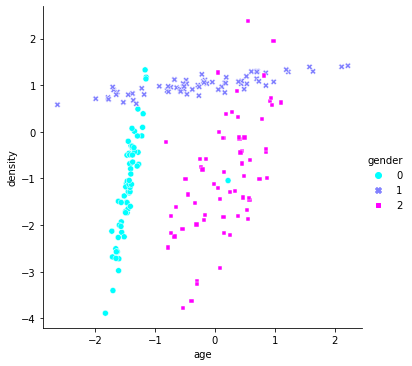

In [26]:
sns.relplot(
    x='age', y='density', hue='gender', style='gender', data=input_df, palette='cool')
plt.show()

In [29]:
# Splitting data
training_features, test_features, training_target, test_target = train_test_split(
    features, target, random_state=0)

In [30]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
model = dtc.fit(training_features, training_target)

In [36]:
predictions = model.predict(test_features)
predictions

array([2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0,
       0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 0, 1, 0, 2, 2])

In [33]:
matrix = confusion_matrix(test_target, predictions)

In [34]:
print(matrix)

[[16  0  0]
 [ 2 14  0]
 [ 2  2 14]]


In [35]:
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.88      0.88      0.88        16
           2       1.00      0.78      0.88        18

    accuracy                           0.88        50
   macro avg       0.89      0.88      0.88        50
weighted avg       0.90      0.88      0.88        50

